# EDA on Image Dataset

Problem: 
https://www.kaggle.com/c/til2020<br>
Type: Object Detection.
(Single image can contain mutiple objects)

Each training and test JSON is similar to the COCO data format:
{ "images": [...], "annotations": [...], "categories": [...] }

Example of JSON:
"images":[{ "file_name": "1.jpg" "id": "1" }]

"annotations":[{ "id": 1, "image_id": 10, "category_id": 4, "bbox": [704, 620, 1401, 1645] # left, top, width, height (xywh) }]

"categories": [ {"id": 1, "name": "tops"}, {"id": 2, "name": "trousers"}, {"id": 3, "name": "outerwear"}, {"id": 4, "name": "dresses"}, {"id": 5, "name": "skirts"}]}

In [83]:
import pickle
import json
from collections import Counter

base_dir = r"U:\Study\Durham_AI_Course\CapstoneOne\data\\"

with open(base_dir + r"train.json","r") as file:
    train_data = json.load(file)
    
train_annotations = train_data['annotations']
train_images = train_data['images']
categories = train_data['categories']

In [84]:
print("Number of training images: ", len(train_images))

Number of training images:  8225


In [85]:
print("Number of training annotations: ", len(train_annotations))

Number of training annotations:  13317


In [86]:
with open(base_dir + r"val.json","r") as file:
    val_data = json.load(file)
    
test_annotations = val_data['annotations']
test_images = val_data['images']

In [87]:
print("Number of testing images: ", len(test_images))

Number of testing images:  1474


In [88]:
print("Number of testing annotations: ", len(test_annotations))

Number of testing annotations:  2458


Number of images with multiple annotations

In [89]:
img_ids = [an['image_id'] for an in train_annotations]
images_with_multiple_objects = []

for img_id, value in Counter(img_ids).items():
    if value > 1:
        images_with_multiple_objects.append((img_id,value))

print(len(images_with_multiple_objects))

3308


Category wise count

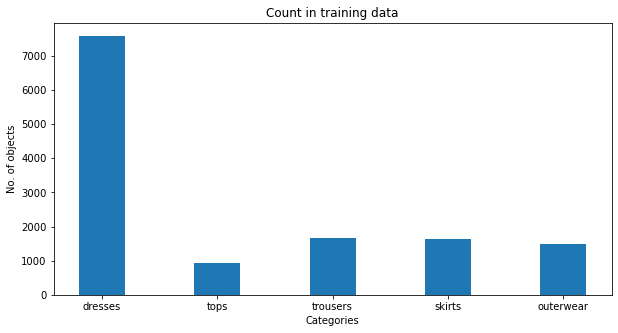

Category: 4, Count: 7585
Category: 1, Count: 945
Category: 2, Count: 1671
Category: 5, Count: 1630
Category: 3, Count: 1486


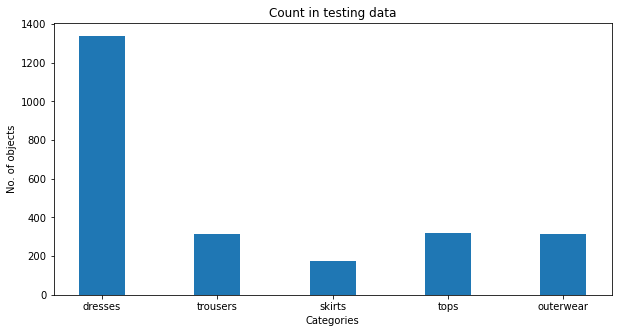

Category: 4, Count: 1338
Category: 2, Count: 313
Category: 5, Count: 174
Category: 1, Count: 317
Category: 3, Count: 316


In [90]:
import matplotlib.pyplot as plt

cat = {
    1: "tops",
    2: "trousers",
    3: "outerwear",
    4: "dresses",
    5: "skirts"
}

category_count = Counter([an['category_id'] for an in train_annotations])

courses = [cat[key] for key in category_count.keys()] 
values = list(category_count.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, width = 0.4) 
  
plt.xlabel("Categories") 
plt.ylabel("No. of objects") 
plt.title("Count in training data") 
plt.show() 

for key, val in category_count.items():
    print(f"Category: {key}, Count: {val}")
    
category_count = Counter([an['category_id'] for an in test_annotations])

courses = [cat[key] for key in category_count.keys()] 
values = list(category_count.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, width = 0.4) 
  
plt.xlabel("Categories") 
plt.ylabel("No. of objects") 
plt.title("Count in testing data") 
plt.show() 
for key, val in category_count.items():
    print(f"Category: {key}, Count: {val}")

# Example Input Image

In [91]:
test_annotations[0]

{'area': 996743,
 'iscrowd': 0,
 'id': 1,
 'image_id': 1,
 'category_id': 4,
 'bbox': [523, 55, 869, 1147]}

In [92]:
test_images[0]

{'file_name': '1.jpg', 'id': 1}

In [93]:
categories

[{'id': 1, 'name': 'tops'},
 {'id': 2, 'name': 'trousers'},
 {'id': 3, 'name': 'outerwear'},
 {'id': 4, 'name': 'dresses'},
 {'id': 5, 'name': 'skirts'}]

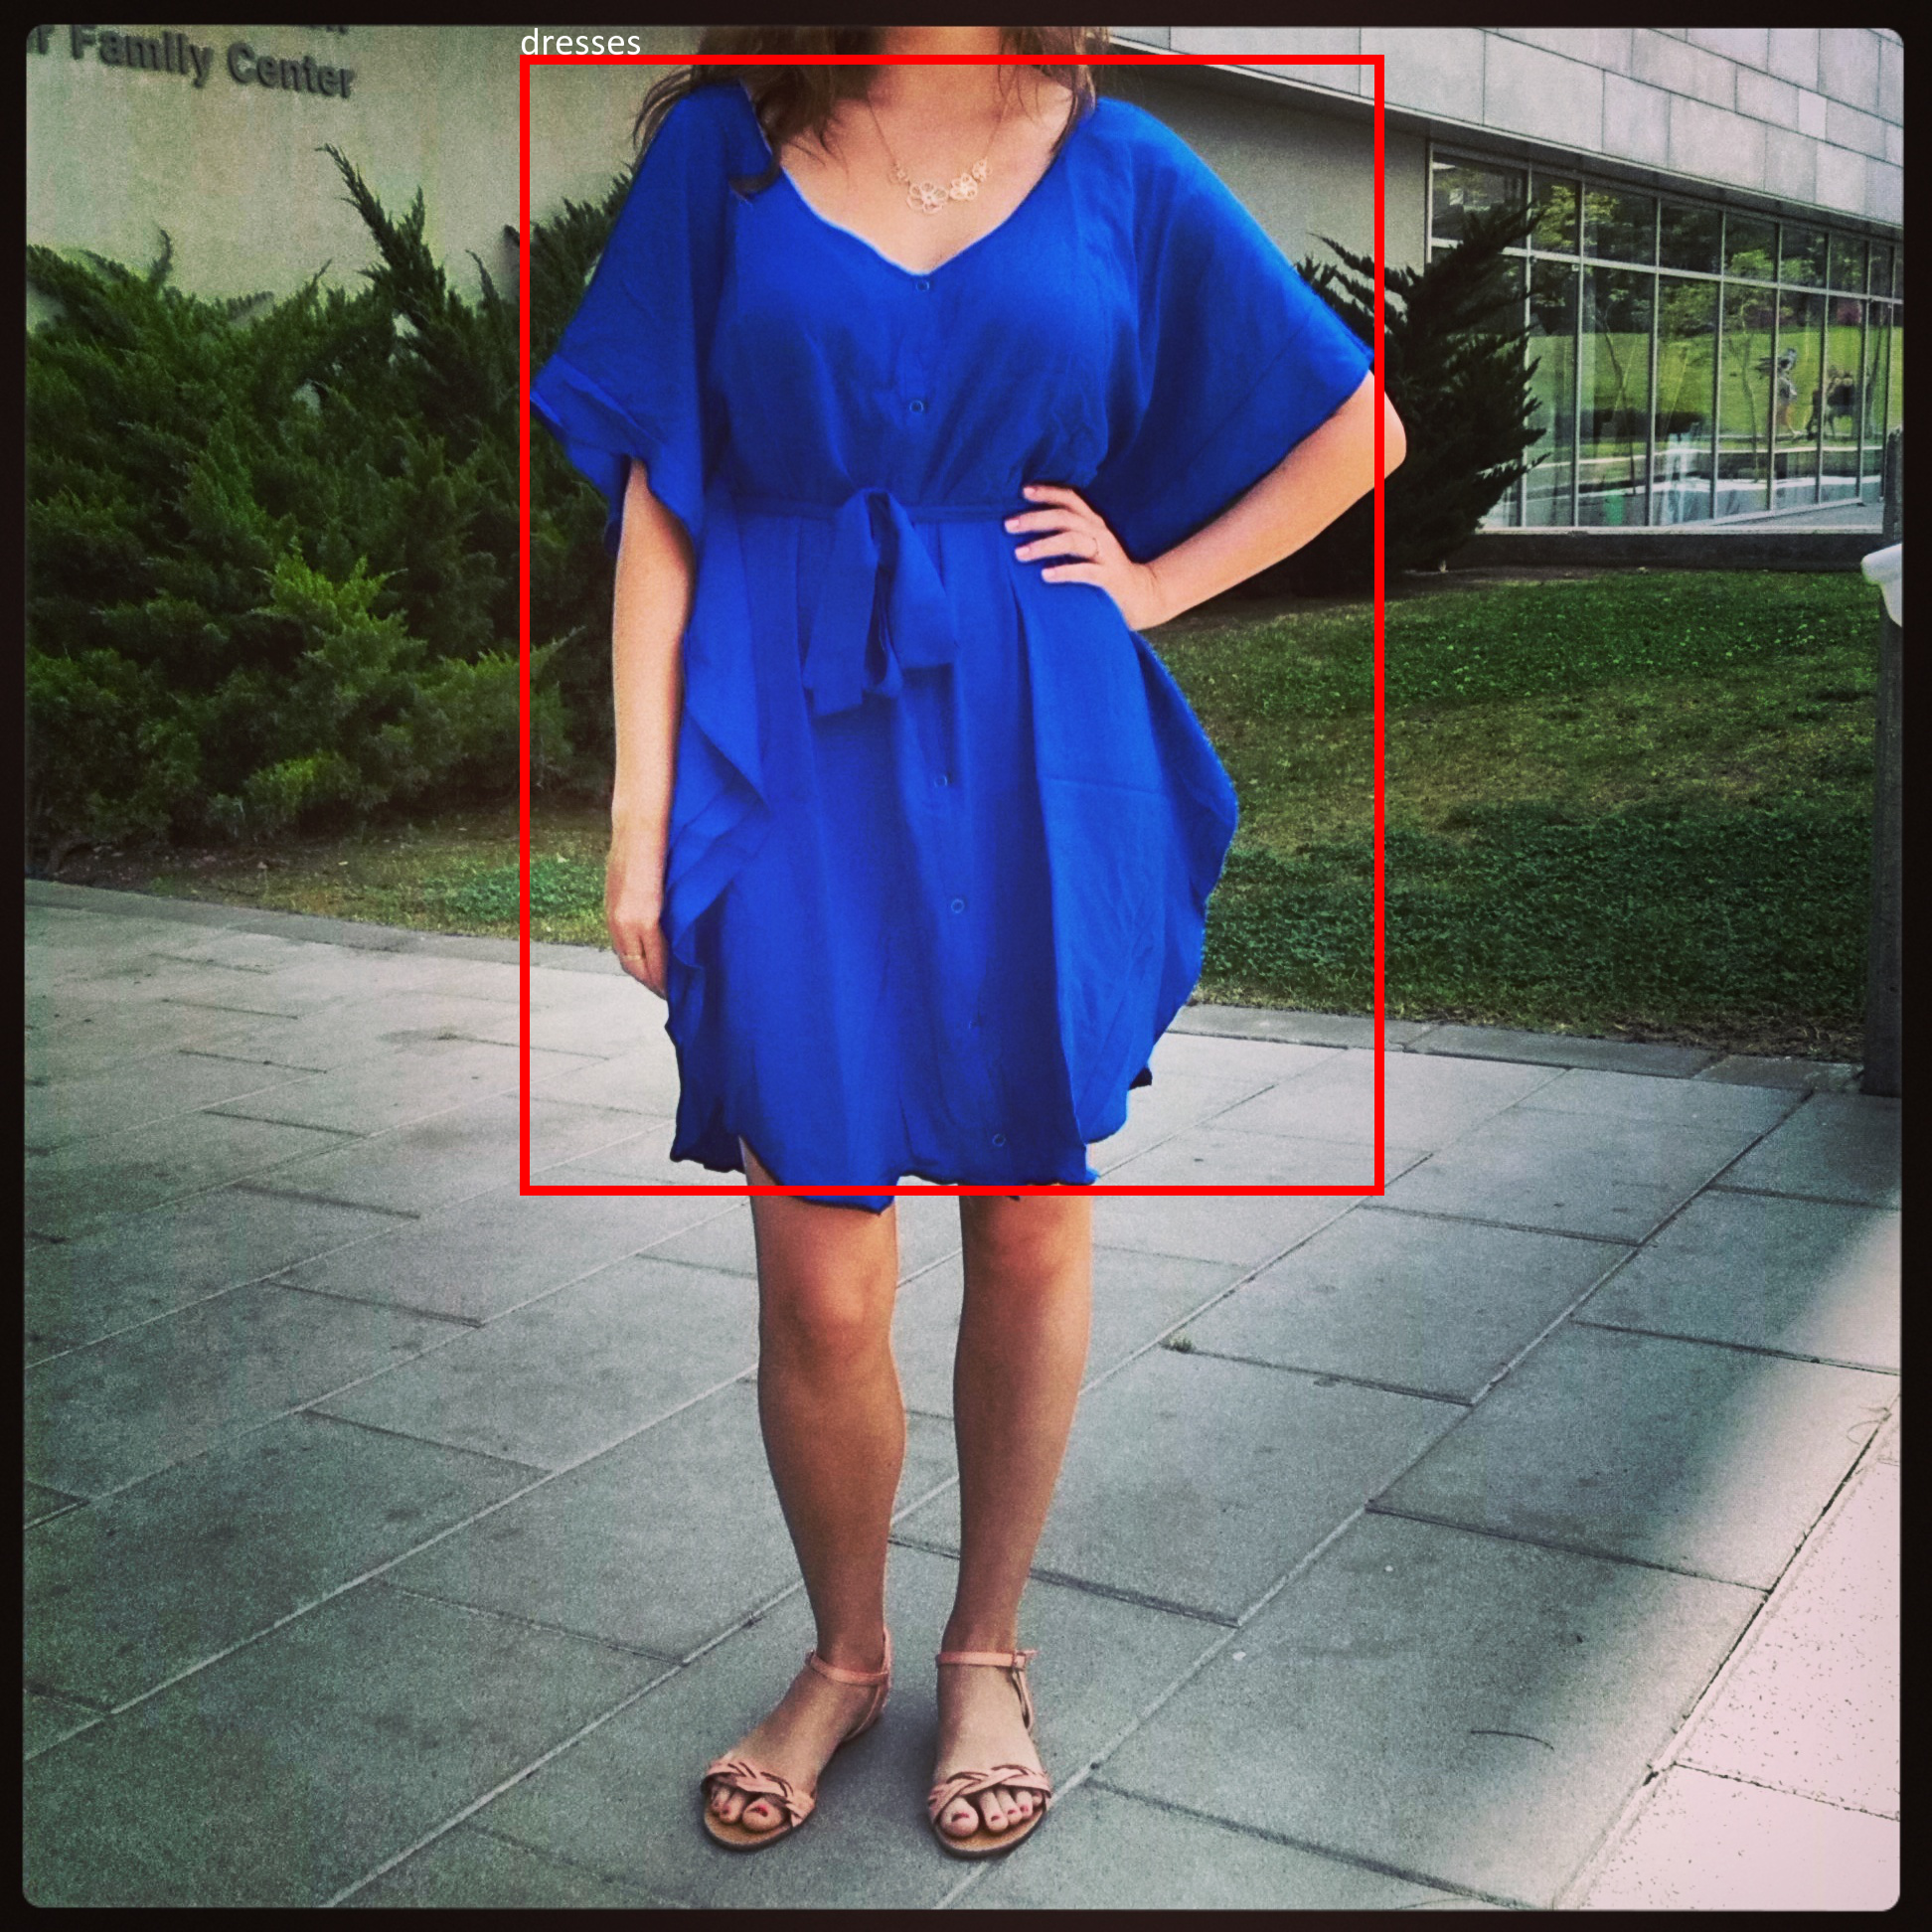

In [94]:
from PIL import Image, ImageFont, ImageDraw  

img = Image.open(base_dir+r"val\val\1.jpg")
# create rectangle image 
img1 = ImageDraw.Draw(img)   
img1.rectangle(((523, 55),(523+869, 55+1147)),  outline ="red",width=10) 
fnt = ImageFont.truetype(r"C:\Windows\Fonts\Calibri.ttf", 40)
img1.text((523,25), "dresses", font=fnt, fill=(255,255,255,128))
display(img)

In [34]:
from basic_image_eda import BasicImageEDA

data_dir = base_dir + r"train\train"
BasicImageEDA.explore(data_dir)


found 8225 images.


  0%|                                                                                         | 0/8225 [00:00<?, ?it/s]

Using 8 threads. (max:8)



100%|██████████████████████████████████████████████████████████████████████████████| 8225/8225 [16:14<00:00,  8.44it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  8225

dtype                                    |  uint8
channels                                 |  [1, 3, 4]
extensions                               |  ['jpg']

min height                               |  255
max height                               |  17885
mean height                              |  2015.9939209726444
median height                            |  1880

min width                                |  218
max width                                |  6926
mean width                               |  1526.2573860182372
median width                             |  1292

mean height/width ratio                  |  1.3208741457638753
median height/width ratio                |  1.4551083591331269
recommended input size(by mean)          |  [2016 1528] (h x w, multiples of 8)
recommended input size(by mean)          |  [2016 1520] (h x w, multiples of

{'dtype': 'uint8',
 'channels': [1, 3, 4],
 'extensions': ['jpg'],
 'min_h': 255,
 'max_h': 17885,
 'mean_h': 2015.9939209726444,
 'median_h': 1880,
 'min_w': 218,
 'max_w': 6926,
 'mean_w': 1526.2573860182372,
 'median_w': 1292,
 'mean_hw_ratio': 1.3208741457638753,
 'median_hw_ratio': 1.4551083591331269,
 'rec_hw_size_8': array([2016, 1528]),
 'rec_hw_size_16': array([2016, 1520]),
 'rec_hw_size_32': array([2016, 1536]),
 'mean': array([0.52427036, 0.47427943, 0.432459  ], dtype=float32),
 'std': array([0.2934654 , 0.28789976, 0.28450784], dtype=float32)}

In [35]:
from basic_image_eda import BasicImageEDA

data_dir = base_dir + r"val\val"
BasicImageEDA.explore(data_dir)

  0%|                                                                                         | 0/1474 [00:00<?, ?it/s]


found 1474 images.
Using 8 threads. (max:8)



100%|██████████████████████████████████████████████████████████████████████████████| 1474/1474 [03:31<00:00,  6.96it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1474

dtype                                    |  uint8
channels                                 |  [1, 3, 4]
extensions                               |  ['jpg']

min height                               |  401
max height                               |  6016
mean height                              |  2074.3324287652645
median height                            |  1936

min width                                |  338
max width                                |  5184
mean width                               |  1557.6811397557667
median width                             |  1468

mean height/width ratio                  |  1.331679748713209
median height/width ratio                |  1.318801089918256
recommended input size(by mean)          |  [2072 1560] (h x w, multiples of 8)
recommended input size(by mean)          |  [2080 1552] (h x w, multiples of 16

{'dtype': 'uint8',
 'channels': [1, 3, 4],
 'extensions': ['jpg'],
 'min_h': 401,
 'max_h': 6016,
 'mean_h': 2074.3324287652645,
 'median_h': 1936,
 'min_w': 338,
 'max_w': 5184,
 'mean_w': 1557.6811397557667,
 'median_w': 1468,
 'mean_hw_ratio': 1.331679748713209,
 'median_hw_ratio': 1.318801089918256,
 'rec_hw_size_8': array([2072, 1560]),
 'rec_hw_size_16': array([2080, 1552]),
 'rec_hw_size_32': array([2080, 1568]),
 'mean': array([0.5319183 , 0.48195285, 0.43896633], dtype=float32),
 'std': array([0.2930611 , 0.28769374, 0.28460744], dtype=float32)}